In [1]:
# Importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
from ipywidgets import FloatProgress
from IPython.display import display
from scipy.spatial import distance_matrix

In [2]:
# Read data
data = input_data.read_data_sets("MNIST/", one_hot=True)

Extracting MNIST/train-images-idx3-ubyte.gz
Extracting MNIST/train-labels-idx1-ubyte.gz
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz


In [3]:
samples = [[] for i in range(10)]
for image, label in zip(data.train.images, data.train.labels):
    label = np.argmax(label)
    if len(samples[label]) < 1000:
        samples[label].append(image / 255.5)
samples = [image for s in samples for image in s] # flatten

In [4]:
# Calculate distances between all samples
N = len(samples)
D_matrix = distance_matrix(samples, samples)
D_matrix = np.power(D_matrix, 2) # calculating the differences of square distances instead

In [5]:
tf.reset_default_graph()

# Placeholder for distance matrix
D = tf.placeholder(tf.float32, [N, N])

# Variable X' -> [10000, 2]
X_prime = tf.get_variable("X", initializer=tf.random_normal((N, 2), stddev=1.0))

# Calculate D' -> [10000, 10000]
# Source: https://stackoverflow.com/questions/37009647/compute-pairwise-distance-in-a-batch-without-replicating-tensor-in-tensorflow
X_prime_a = tf.expand_dims(X_prime, 1) # [10000, 1, 2]
X_prime_b = tf.expand_dims(X_prime, 0) # [1, 10000, 2]
D_prime = tf.reduce_sum(tf.squared_difference(X_prime_a, X_prime_b), 2)

# Loss function
loss = tf.reduce_sum(tf.reduce_sum(tf.matrix_band_part(tf.pow(D_prime - D, 2), 0, -1)))

In [6]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
X = sess.run(X_prime)

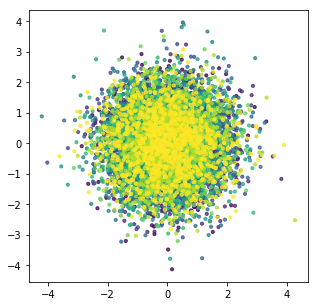

In [7]:
x = [x[0] for x in X]
y = [x[1] for x in X]
colors = [c for c in np.arange(0, 1, 0.1) for i in range(1000)]

plt.figure(figsize=(5, 5))
plt.scatter(x, y, s=10.0, c=colors, alpha=0.75)
plt.show()

In [8]:
# Define optimizer
optim = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)
tf.global_variables_initializer().run()

In [9]:
# Minimize the loss
num_iter = 100
loss_values = []
progress = FloatProgress(min=0, max=num_iter); display(progress)
for i in range(num_iter):
    progress.description = "Epoch %i/%i" % (i, num_iter)
    _, l, X = sess.run([optim, loss, X_prime], feed_dict = { D: D_matrix })
    loss_values.append(l)
    progress.value += 1

A Jupyter Widget

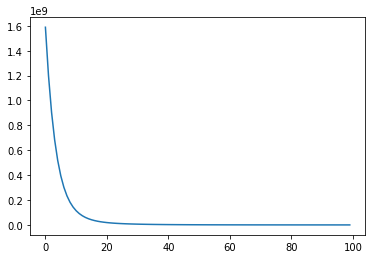

In [10]:
plt.plot(loss_values)
plt.show()

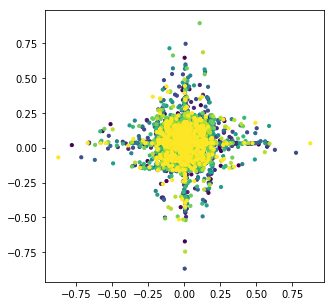

In [11]:
x = [x[0] for x in X]
y = [x[1] for x in X]

plt.figure(figsize=(5, 5))
plt.scatter(x, y, s=10.0, c=colors)
plt.show()